In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from utils import *
update_plot_defaults()
%load_ext autoreload
%autoreload 2

# Na channels: recovery from inactivation

## 1. Choose the data file you want to analyze

In [2]:
pathToData = "data/"
data_folders = glob(pathToData+"*") # The glob function helps you filter your files
print("Data folders:")
data_folders

Data folders:


['data/Fig_Nav',
 'data/single_channel_recordings',
 'data/Fig_Cav',
 'data/example_HEKA.dat',
 'data/link_to_data.txt',
 'data/Fig_Kv']

In [3]:
data_files = glob(data_folders[0]+"/*.abf")
print(data_folders[0])
data_files

data/Fig_Nav


['data/Fig_Nav/nav18-iv.abf',
 'data/Fig_Nav/nav18-ssinact.abf',
 'data/Fig_Nav/nav18-nav_recovery.abf',
 'data/Fig_Nav/NAV_Tho(1)_21309013.abf',
 'data/Fig_Nav/NAV_Cerv(3)_22712021.abf',
 'data/Fig_Nav/NAV_Tho(2)_21309018.abf',
 'data/Fig_Nav/NAV_Cerv(1)_22712019.abf',
 'data/Fig_Nav/NAV_Cerv(2)_22712020.abf',
 'data/Fig_Nav/NAV_Lomb(1)_22919024.abf',
 'data/Fig_Nav/NAV_Lomb(2)_22919023.abf']

In [4]:
data_file = 'data/Fig_Nav/nav18-nav_recovery.abf'

In [5]:
## Extract the sweeps, time and sampling frequency:
sweeps, sweeps_time, sampling_freq = get_sweeps(data_file)

print(sweeps.shape)
print(sweeps_time.shape)
print(f"freq: {sampling_freq} Hz")

(30, 2, 5160)
(5160,)
freq: 49999.99999999999 Hz


## 2. Plot the traces to get an overview of the data

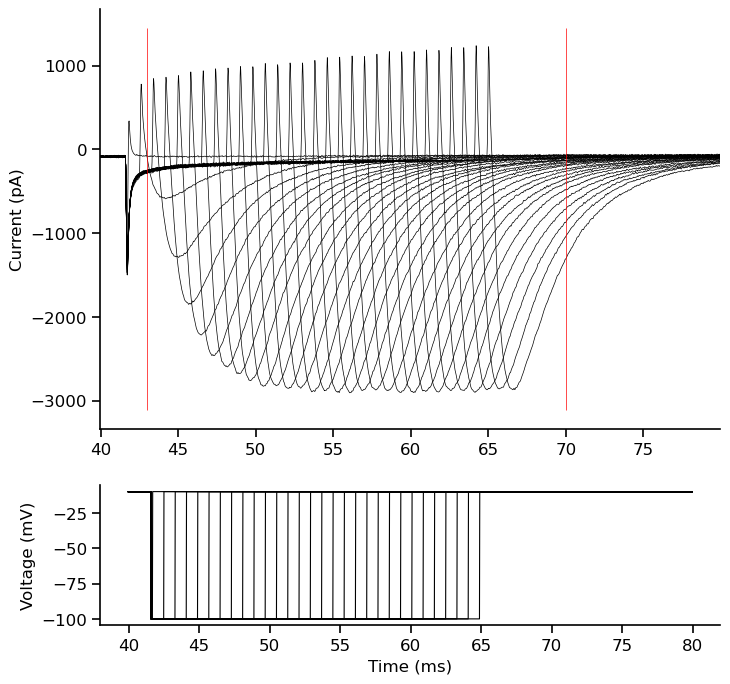

In [6]:
start_time = 40 # milliseconds
end_time = 80 # milliseconds

marker_1 = 43 # milliseconds
marker_2 = 70 # milliseconds

current_traces, time_in_window = select_sweep_window(sweeps, sweeps_time, start_time, end_time, sampling_freq, channel=0)
voltage_traces, time_in_window = select_sweep_window(sweeps, sweeps_time, start_time, end_time, sampling_freq, channel=1)

plot_traces(time_in_window, current_traces, voltage_traces, marker_1, marker_2)
plt.show()

## 3. Select what you want to measure:
- define the time window(s) of interest
- define what you want to measure (e.g. mean or peak voltage/current)

### 3.1. Optional: apply baseline correction

In [7]:
# # 1. Measure baseline
# start_time = 0 # milliseconds
# end_time = 0.5 # milliseconds
# measurement_type = 'mean' # Options: 'mean', 'max', 'min'

# baseline_voltage, baseline_current = get_step_measurements(sweeps, sweeps_time, start_time, end_time, sampling_freq, measurement_type)

# num_traces = sweeps.shape[0]
# for i in range(num_traces):
#     # sweeps[i,1] -= baseline_voltage[i]
#     sweeps[i,0] -= baseline_current[i]

# plot_traces(time_in_window, current_traces, voltage_traces, marker_1, marker_2)

### 3.2. Get the baseline current to normalize against


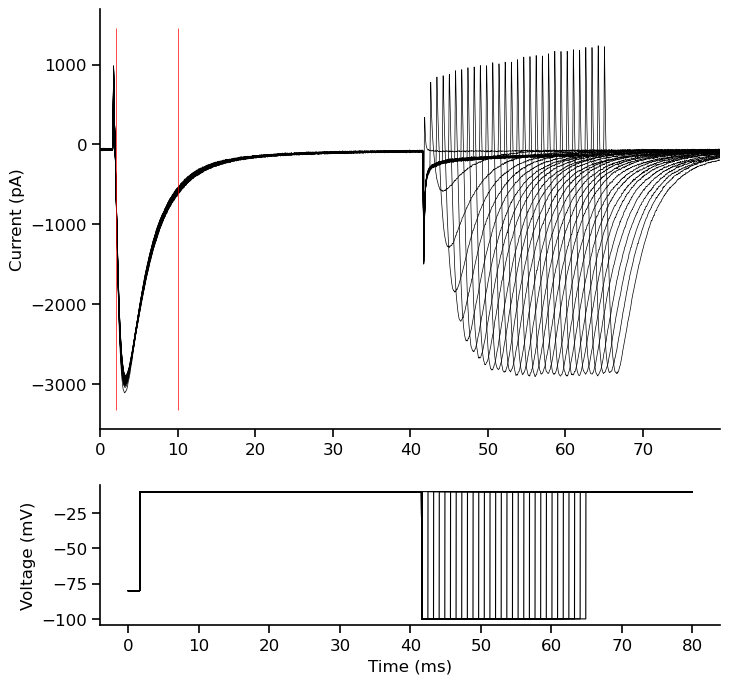

In [8]:
start_time = 0 # milliseconds
end_time = 80 # milliseconds

marker_4 = 2 # milliseconds
marker_5 = 10 # milliseconds

current_traces, time_in_window = select_sweep_window(sweeps, sweeps_time, start_time, end_time, sampling_freq, channel=0)
voltage_traces, time_in_window = select_sweep_window(sweeps, sweeps_time, start_time, end_time, sampling_freq, channel=1)

start_time = marker_4 # milliseconds
end_time = marker_5 # milliseconds
measurement_type = 'min' # Options: 'mean', 'max', 'min', 'peak'
_, baseline_current_steps = get_step_measurements(sweeps, sweeps_time, start_time, end_time, sampling_freq, measurement_type)

plot_traces(time_in_window, current_traces, voltage_traces, marker_4, marker_5)
plt.show()

### 3.2. Measure currents/voltage steps

In [ ]:
start_time = marker_1 # milliseconds
end_time = marker_2 # milliseconds
measurement_type = 'min' # Options: 'mean', 'max', 'min', 'peak'

# Get the current steps in the selected time window
_, current_steps = get_step_measurements(sweeps, sweeps_time, start_time, end_time, sampling_freq, measurement_type)

# Normalize to the baseline currents
current_steps = current_steps / baseline_current_steps

Tau: 15.39 ms


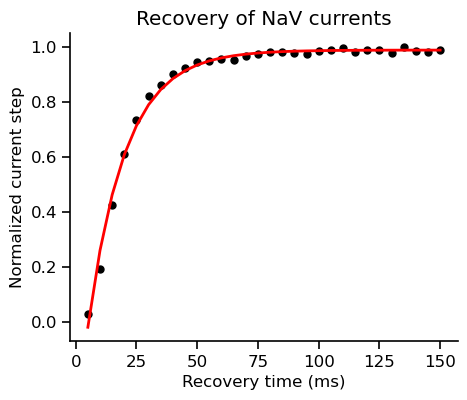

In [ ]:
# Define the delta t delays for the recovery
start = 5   # milliseconds
step = 5    # milliseconds

end = step*(len(current_steps)+1)
delta_t = np.arange(start, end, step)  # in milliseconds

# Plot the normalized current steps against the holding voltages
fig,ax = plt.subplots(figsize=(5, 4))
ax.plot(delta_t, current_steps, 'o', color='black', markersize=5)
ax.set_xlabel('Recovery time (ms)')
ax.set_ylabel('Normalized current step')
ax.set_title('Recovery of NaV currents')

tau = fit_single_exponential(delta_t, current_steps, ax=ax)
print(f"Tau: {tau:.2f} ms")
plt.show()